# 準備

In [1]:
import warnings
warnings.simplefilter('ignore')

# ライブラリのインポート
import pandas as pd
import pickle as pkl
import eli5

In [2]:
# モデルの読み込み
with open('lgbm_model.pkl', 'rb') as f:
    model = pkl.load(f)

# eli5による特徴量重要度の出力

In [3]:
# importance_type='gain'
eli5.show_weights(model, importance_type='gain')

Weight,Feature
0.3770,Sex
0.2078,Fare
0.1232,Title
0.1017,Pclass
0.0923,Family
0.0733,Age
0.0230,Embarked
0.0017,Age_null


In [4]:
# importance_type='split'
eli5.show_weights(model, importance_type='split')

Weight,Feature
0.5885,Fare
0.1116,Family
0.1085,Age
0.0542,Pclass
0.0478,Title
0.0415,Embarked
0.0399,Sex
0.0080,Age_null


# モデルの機能を用いた特徴量重要度の算出

In [5]:
# ライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Feature Importanceの取得
feature_imp = model.feature_importances_ / model.feature_importances_.sum()

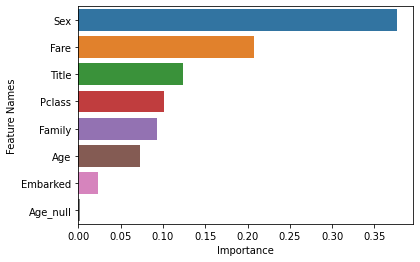

In [7]:
# 表示（Feature Importanceの降順）
fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(x=feature_imp, y=model.feature_name_, 
            order=np.array(model.feature_name_)[np.argsort(feature_imp)[::-1]] )
ax.set(xlabel='Importance', ylabel='Feature Names')
fig.savefig('titanic_feature_importance_gain.png', bbox_inches='tight')

# Permutation Importanceで算出

In [8]:
# ライブラリのインポート
from eli5.sklearn import PermutationImportance

In [9]:
# 6章で加工済みデータの読込
train = pd.read_csv('train_proc.csv')
valid = pd.read_csv('valid_proc.csv')

In [10]:
# データの前処理
def make_Xy(df, col_y="Survived"):
    return df.drop(columns=[col_y]), df[col_y]
train_x, train_y = make_Xy(train)
valid_x, valid_y = make_Xy(valid)

In [11]:
# Permutation Importanceの獲得と表示
## trainデータで算出
perm_train = PermutationImportance(model).fit(train_x, train_y)
eli5.show_weights(perm_train, feature_names=model.feature_name_)

Weight,Feature
0.0686 ± 0.0287,Title
0.0644 ± 0.0145,Sex
0.0464 ± 0.0122,Fare
0.0419 ± 0.0021,Family
0.0219 ± 0.0081,Pclass
0.0155 ± 0.0078,Age
0.0042 ± 0.0067,Embarked
0 ± 0.0000,Age_null


In [12]:
## validデータで算出
perm_valid = PermutationImportance(model).fit(valid_x, valid_y)
eli5.show_weights(perm_valid, feature_names=model.feature_name_)

Weight,Feature
0.0876 ± 0.0272,Title
0.0798 ± 0.0288,Sex
0.0382 ± 0.0279,Family
0.0292 ± 0.0180,Age
0.0258 ± 0.0290,Fare
0.0157 ± 0.0165,Pclass
-0.0022 ± 0.0055,Age_null
-0.0135 ± 0.0090,Embarked
